In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.mixture import GaussianMixture as GMM

In [2]:
# load data
digits = load_digits()


print(digits.data.shape)
# 1797 photos, 8x8

(1797, 64)


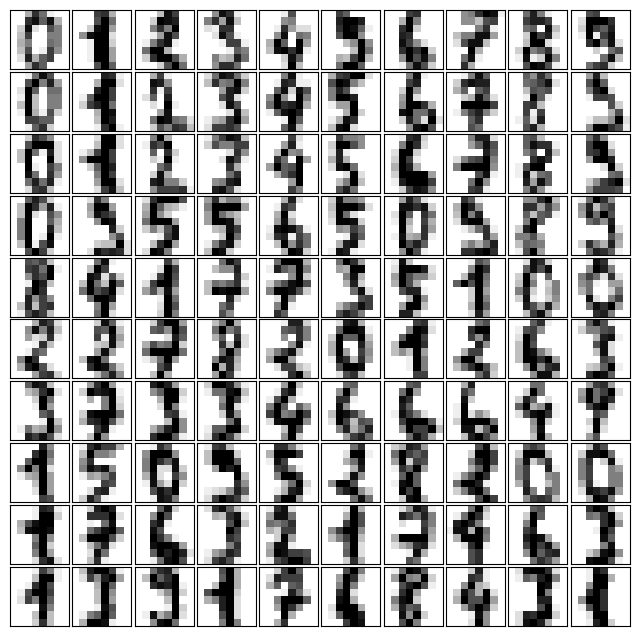

In [3]:
# the function to show the first 100 images of the digits dataset
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
# show first 100 photos
plot_digits(digits.data)

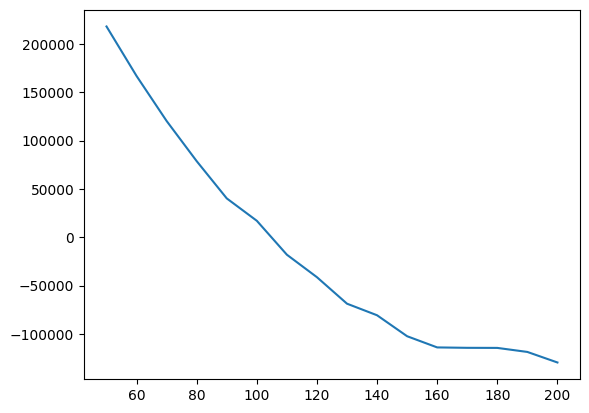

In [15]:
from sklearn.decomposition import PCA
# initialize the PCA class
pca = PCA(32)
# get the data
data = digits.data
# train the PCA model
pca.fit(data)
# perform the algorithm on the data
data = pca.transform(data)

# number of components array
n_components = np.arange(50, 210, 10)
# models for different number of components
models = [GMM(n, covariance_type='full', random_state=0) for n in n_components]
# low aic means better result
aics = [model.fit(data).aic(data) for model in models]

plt.plot(n_components, aics)

In [16]:
# Gaussian Mixture Model
gmm = GMM(100, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [17]:
# draw 100 samples from Gaussian Distribution, where the 100 samples are not from our original datasets
data_new = gmm.sample(100)
data_new[0].shape

(100, 32)

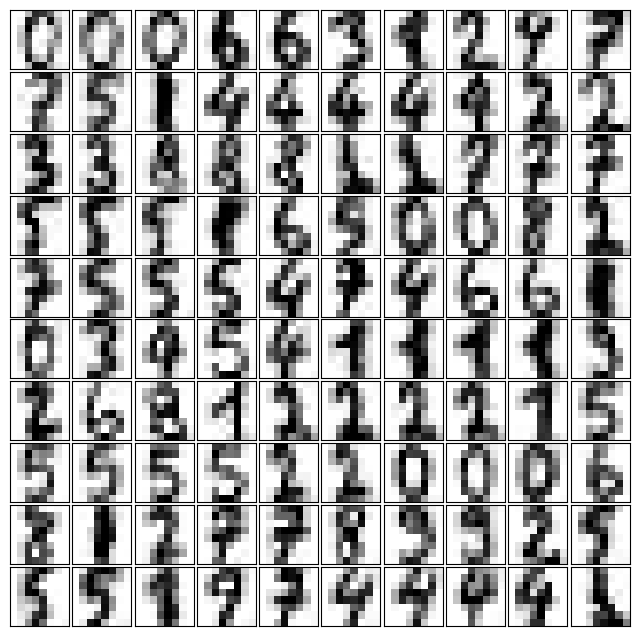

In [21]:
# restore pca data(samples generated from gmm) to pixels
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)